# Euler's Method 

## Definition
Euler's Method is a way of using a derivative of a function and a coordinate on the function to estimate the function.

We use it by finding the line tangent to the point, then evaluating that a step value forward, then repeating the process.

For examples, see below.

In [19]:
%matplotlib inline

import matplotlib.pyplot as plt
plt.style.use('seaborn-colorblind')

# First, we define Euler's method
def euler(f,y0,x0,iterations,step):
    """Takes a function, starting coords, number of iterations,
    and step value. Returns a list of two-tuples (x,y)"""
    # Set t and y to the inital values
    t,y = x0,y0
    out = [(t,y)]
    while t <= ((iterations-1)*step)-0.00001:
        t += step
        # Multiply step by slope at (t,y), add to y
        y += step * f(t,y)
        out.append((t,y))
    return out

#TODO Make this a generator

# Method to plot points
def plot(vals, ylabel="Value of y", xlabel="Value of x", pointstr='bo-', label='', title='Approximate Solution with Forward Euler\'s Method'):
    plt.title(title)
    plt.ylabel(ylabel); plt.xlabel(xlabel)
    y_vals = [tup[1] for tup in vals]
    x_vals = [tup[0] for tup in vals]
    #[plt.plot(*tup, 'bo') for tup in vals]
    plt.plot(x_vals, y_vals, pointstr, label=label)

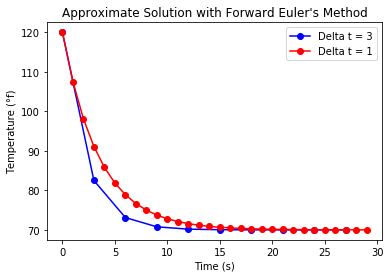

In [8]:
# Here's an example function -- how cooling looks
def cooling(time, temp):
    return -0.25*(temp-70)

plot(euler(f=cooling,
           y0=120,
           x0=0,
           iterations=10,
           step=3),
     ylabel="Temperature (°f)",
     xlabel="Time (s)",
     label="Delta t = 3")

# If we decrease the step, we get a more accurate graph
plot(euler(f=cooling,
           y0=120,
           x0=0,
           iterations=30,
           step=1),
     ylabel="Temperature (°f)",
     xlabel="Time (s)",
     pointstr='ro-',
     label="Delta t = 1")

plt.legend()
plt.show()

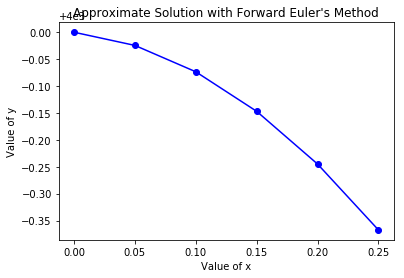

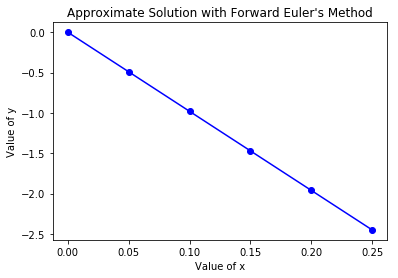

Time,Altitude,Velocity,Acceleration
0,4000,0,-9.8
0.05,3999.98,-0.49,-9.8
0.1,3999.93,-0.98,-9.8
0.15,3999.85,-1.47,-9.8
0.2,3999.76,-1.96,-9.8
0.25,3999.63,-2.45,-9.8


In [9]:
# We can use tables too
from tabulate import tabulate
from IPython.display import HTML, display
disp = lambda table: display(HTML(tabulate(table, tablefmt='html', headers=table.keys())))

table = {"Time": [],
         "Altitude": [],
         "Velocity": [],
         "Acceleration": []}

iters = 6
delta_t = 0.05
altitude_0 = 4000
velocity_0 = 0
falling = lambda x, y: -9.8*x

table["Time"] = [delta_t*i for i in range(iters)]
table["Acceleration"] = [-9.8 for _ in range(iters)]

alt_points = euler(f=falling,
                   y0=altitude_0,
                   x0=0,
                   iterations=iters,
                   step=delta_t)
plot(alt_points)
plt.show()
table["Altitude"] = [a[1] for a in alt_points]

vel_points = euler(f=lambda x,y: -9.8,
                   y0=velocity_0,
                   x0=0,
                   iterations=iters,
                   step=delta_t)
plot(vel_points)
plt.show()
table["Velocity"] = [a[1] for a in vel_points] 

disp(table)


In [10]:
# Let's find out when he hits the ground

alt_points = euler(f=falling,
                   y0=altitude_0,
                   x0=0,
                   iterations=9999,
                   step=delta_t)

for p in alt_points:
    if p[1] <= 0:
        HOWLONG = p[0]
        print(f"He hits the ground at {p[0]} seconds. His altitude is {p[1]}")
        break

He hits the ground at 28.55000000000027 seconds. His altitude is -0.9970000000255546


In [11]:
# And how fast he's going

vel_points = euler(f=lambda x,y: -9.8,
                   y0=velocity_0,
                   x0=0,
                   iterations=int(HOWLONG/delta_t),
                   step=delta_t)

print(f"He is going at a rate of {vel_points[-1][1]} m/s")

He is going at a rate of -279.3000000000022 m/s


## Part 2: Air resistance

Time,Altitude,Velocity,Acceleration
171.4,1.73055,-8.90799,8.88178e-15
171.45,1.28515,-8.90799,8.88178e-15
171.5,0.839752,-8.90799,8.88178e-15
171.55,0.394353,-8.90799,8.88178e-15
171.6,-0.0510467,-8.90799,8.88178e-15
171.65,-0.496446,-8.90799,8.88178e-15


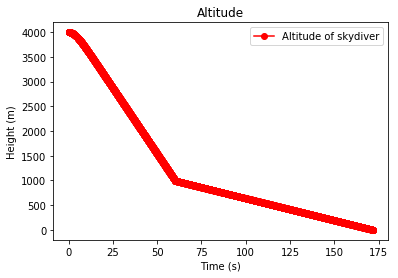

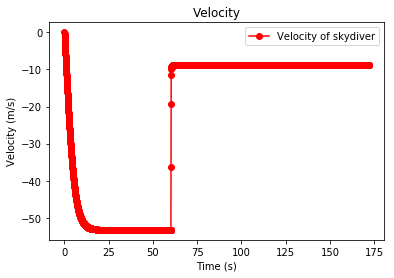

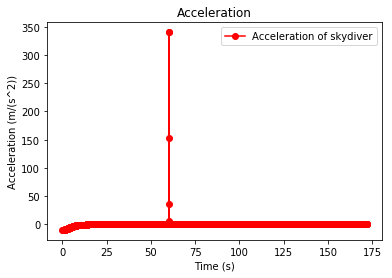

In [34]:
def proportion_air(coefficient, air_density, surface_area, mass):
    """This is the constant of proportionality for the skydiver."""
    num = coefficient*air_density*surface_area
    den = 2*mass
    return num/den

skydiver_constant = proportion_air(coefficient=0.57,
                                   air_density=1.3,
                                   surface_area=0.7,
                                   mass=75)

parachute_constant = proportion_air(coefficient=0.57,
                                   air_density=1.3,
                                   surface_area=25,
                                   mass=75)
#print(skydiver_constant)
#print(parachute_constant)

def acceleration(constant, velocity):
    return -9.8 + (constant * (velocity**2))

def next_row(previous):
    time_p, alt_p, vel_p, acc_p = previous
    delta_t = 0.05
    time = time_p + delta_t
    alt = alt_p + (vel_p * delta_t)
    vel = vel_p + (acc_p * delta_t)
    if alt_p <=1000:
        acc = acceleration(parachute_constant, vel_p)
    else:
        acc = acceleration(skydiver_constant, vel_p)
    return [time, alt, vel, acc]


rows = []
current_row = [0, 4000, 0, -9.8]
for i in range(6):
    rows.append(current_row)
    current_row = next_row(current_row)
    
#print(tabulate(rows, headers=["Time", "Altitude", "Velocity", "Acceleration"]))

current_row = [0, 4000, 0, -9.8]
altitude = 4000
rowstack = [current_row]
smallrowstack= [current_row]
while altitude > 0:
    if len(smallrowstack) > 5:
        smallrowstack.remove(smallrowstack[0])
    altitude = current_row[1]
    current_row = next_row(current_row)
    rowstack.append(current_row)
    smallrowstack.append(current_row)

for i in range(5):
    current_row = next_row(current_row)
    rowstack.append(current_row)
    
alt_points = [(a[0], a[1]) for a in rowstack]
vel_points = [(a[0], a[2]) for a in rowstack]
acc_points = [(a[0], a[3]) for a in rowstack]

display(HTML(tabulate(smallrowstack,
                      headers=["Time", "Altitude",
                               "Velocity", "Acceleration"],
                      tablefmt='html')))


plot(alt_points,
     ylabel="Height (m)",
     xlabel="Time (s)",
     pointstr='ro-',
     label="Altitude of skydiver",
     title='Altitude')
plt.legend()
plt.show()

plot(vel_points,
     ylabel="Velocity (m/s)",
     xlabel="Time (s)",
     pointstr='ro-',
     label="Velocity of skydiver",
     title="Velocity")
plt.legend()
plt.show()

plot(acc_points,
     ylabel="Acceleration (m/(s^2))",
     xlabel="Time (s)",
     pointstr='ro-',
     label="Acceleration of skydiver",
     title='Acceleration')
plt.legend()
plt.show()

Time,Altitude,Velocity,Acceleration
23.15,1.84675,-10.5401,5.48361e-12
23.2,1.31975,-10.5401,4.91518e-12
23.25,0.792743,-10.5401,4.40714e-12
23.3,0.26574,-10.5401,3.95062e-12
23.35,-0.261264,-10.5401,3.54206e-12
23.4,-0.788267,-10.5401,3.17435e-12


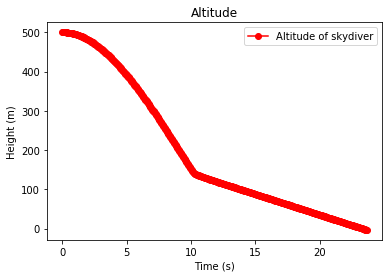

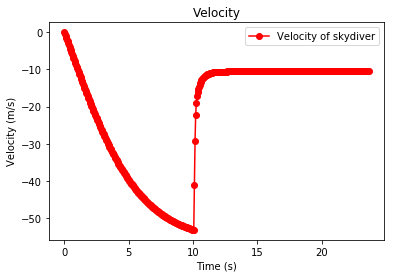

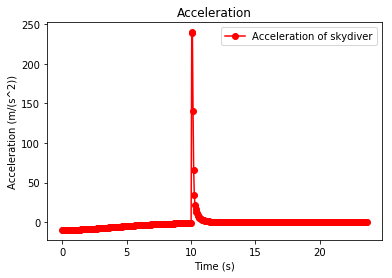

In [29]:
def proportion_air(coefficient, air_density, surface_area, mass):
    """This is the constant of proportionality for the skydiver."""
    num = coefficient*air_density*surface_area
    den = 2*mass
    return num/den


skydiver_constant = proportion_air(coefficient=0.57,
                                   air_density=1.3,
                                   surface_area=0.7,
                                   mass=84)

parachute_constant = proportion_air(coefficient=0.57,
                                   air_density=1.3,
                                   surface_area=20,
                                   mass=84)
#print(skydiver_constant)
#print(parachute_constant)

def acceleration(constant, velocity):
    return -9.8 + (constant * (velocity**2))

def next_row(previous):
    time_p, alt_p, vel_p, acc_p = previous
    delta_t = 0.05
    time = time_p + delta_t
    alt = alt_p + (vel_p * delta_t)
    vel = vel_p + (acc_p * delta_t)
    if time_p >= 10:
        acc = acceleration(parachute_constant, vel_p)
    else:
        acc = acceleration(skydiver_constant, vel_p)
    return [time, alt, vel, acc]


# rows = []
# current_row = [0, 4000, 0, -9.8]
# for i in range(6):
#     rows.append(current_row)
#     current_row = next_row(current_row)
    
#print(tabulate(rows, headers=["Time", "Altitude", "Velocity", "Acceleration"]))

current_row = [0, 500, 0, -9.8]
altitude = 500
rowstack = [current_row]
smallrowstack= [current_row]
while altitude > 0:
    if len(smallrowstack) > 5:
        smallrowstack.remove(smallrowstack[0])
    altitude = current_row[1]
    current_row = next_row(current_row)
    rowstack.append(current_row)
    smallrowstack.append(current_row)

for i in range(5):
    current_row = next_row(current_row)
    rowstack.append(current_row)
    
alt_points = [(a[0], a[1]) for a in rowstack]
vel_points = [(a[0], a[2]) for a in rowstack]
acc_points = [(a[0], a[3]) for a in rowstack]

display(HTML(tabulate(smallrowstack,
                      headers=["Time", "Altitude",
                               "Velocity", "Acceleration"],
                      tablefmt='html')))


plot(alt_points,
     ylabel="Height (m)",
     xlabel="Time (s)",
     pointstr='ro-',
     label="Altitude of skydiver",
     title='Altitude')
plt.legend()
plt.show()

plot(vel_points,
     ylabel="Velocity (m/s)",
     xlabel="Time (s)",
     pointstr='ro-',
     label="Velocity of skydiver",
     title="Velocity")
plt.legend()
plt.show()

plot(acc_points,
     ylabel="Acceleration (m/(s^2))",
     xlabel="Time (s)",
     pointstr='ro-',
     label="Acceleration of skydiver",
     title='Acceleration')
plt.legend()
plt.show()
